In [81]:
#Import Libraries
import os
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import string
import datetime
from datetime import datetime
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import random


In [82]:
#Load the Dataset
Covid_tweets=pd.read_csv('C:\\Users\\Aparna Singh\\Desktop\\COVID\\covid19_tweets.csv')
print(Covid_tweets)

                        user_name         user_location  \
0                          ᏉᎥ☻լꂅϮ            astroworld   
1                   Tom Basile 🇺🇸          New York, NY   
2                 Time4fisticuffs      Pewee Valley, KY   
3                     ethel mertz  Stuck in the Middle    
4                        DIPR-J&K     Jammu and Kashmir   
...                           ...                   ...   
97705               Paul Kneeshaw              Canberra   
97706    Mary Loedding Sells 🇺🇸🇮🇱                Alaska   
97707        💯🌊PJT #TurnTexasBlue         United States   
97708  Prawin #StayHome #Staysafe      Hyderabad, India   
97709                Heart & Soul                   NaN   

                                        user_description     user_created  \
0      wednesday addams as a disney princess keepin i...   5/26/2017 5:46   
1      Husband, Father, Columnist & Commentator. Auth...  4/16/2009 20:06   
2      #Christian #Catholic #Conservative #Reagan #Re...  2/

In [83]:
#Basic info
Covid_tweets.describe

<bound method NDFrame.describe of                         user_name         user_location  \
0                          ᏉᎥ☻լꂅϮ            astroworld   
1                   Tom Basile 🇺🇸          New York, NY   
2                 Time4fisticuffs      Pewee Valley, KY   
3                     ethel mertz  Stuck in the Middle    
4                        DIPR-J&K     Jammu and Kashmir   
...                           ...                   ...   
97705               Paul Kneeshaw              Canberra   
97706    Mary Loedding Sells 🇺🇸🇮🇱                Alaska   
97707        💯🌊PJT #TurnTexasBlue         United States   
97708  Prawin #StayHome #Staysafe      Hyderabad, India   
97709                Heart & Soul                   NaN   

                                        user_description     user_created  \
0      wednesday addams as a disney princess keepin i...   5/26/2017 5:46   
1      Husband, Father, Columnist & Commentator. Auth...  4/16/2009 20:06   
2      #Christian #Catholi

In [19]:
Covid_tweets.columns

Index(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'is_retweet'],
      dtype='object')

In [21]:
Covid_tweets.head(6)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False
5,🎹 Franz Schubert,Новоро́ссия,🎼 #Новоро́ссия #Novorossiya #оставайсядома #S...,2018-03-19 16:29:52,1180,1071,1287,False,2020-07-25 12:27:06,#coronavirus #covid19 deaths continue to rise....,"['coronavirus', 'covid19']",Twitter Web App,False


In [22]:
#Data set dimensions
print(f"Dataset dimension:\n{Covid_tweets.shape}")

Dataset dimension:
(97710, 13)


In [24]:
#check for missing values
print("Percentage of missing values")
print("============================")

for var in Covid_tweets.columns:
    if Covid_tweets[var].isna().sum() >0:
        miss = np.round(Covid_tweets[var].isna().sum()/Covid_tweets.shape[0] * 100,3)
        print(var, "has {0}% of missing values".format(miss))

Percentage of missing values
user_location has 20.294% of missing values
user_description has 5.656% of missing values
hashtags has 28.678% of missing values
source has 0.027% of missing values


In [26]:
Covid_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97710 entries, 0 to 97709
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_name         97710 non-null  object
 1   user_location     77881 non-null  object
 2   user_description  92184 non-null  object
 3   user_created      97710 non-null  object
 4   user_followers    97710 non-null  int64 
 5   user_friends      97710 non-null  int64 
 6   user_favourites   97710 non-null  int64 
 7   user_verified     97710 non-null  bool  
 8   date              97710 non-null  object
 9   text              97710 non-null  object
 10  hashtags          69689 non-null  object
 11  source            97684 non-null  object
 12  is_retweet        97710 non-null  bool  
dtypes: bool(2), int64(3), object(8)
memory usage: 8.4+ MB


In [27]:
Covid_tweets.describe()

,user_followers,user_friends,user_favourites
count,9.771000e+04,97710.000000,9.771000e+04
mean,1.045292e+05,2181.507256,1.509686e+04
std,8.141692e+05,9650.933428,4.589731e+04
min,0.000000e+00,0.000000,0.000000e+00
25%,1.700000e+02,154.000000,2.220000e+02
50%,9.800000e+02,552.000000,1.906000e+03
75%,5.240750e+03,1770.000000,9.981000e+03
max,1.389284e+07,497363.000000,2.047197e+06


In [28]:
#Check for unique locations
print("No. Of Unique Locations:",Covid_tweets["user_location"].nunique())

No. Of Unique Locations: 17881


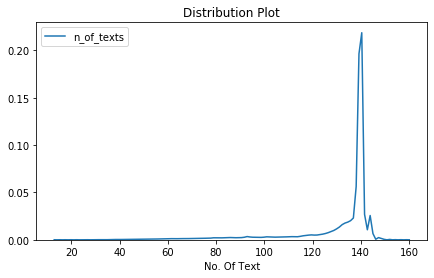

In [29]:
# Distribution plot
Covid_tweets["n_of_texts"] = Covid_tweets["text"].apply(lambda x: len(x))
plt.figure(figsize=(7,4))
sns.kdeplot(Covid_tweets["n_of_texts"])
plt.title("Distribution Plot")
plt.xlabel("No. Of Text")
plt.show()


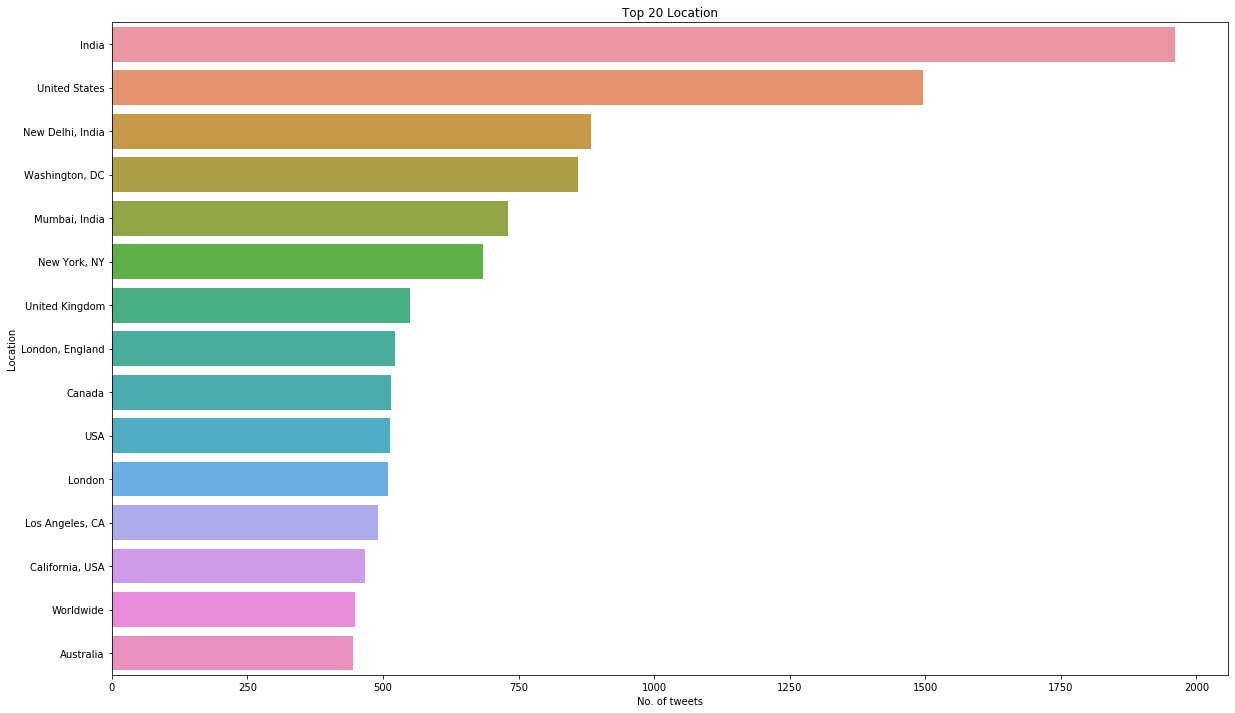

In [33]:
#Check for location of most tweets
plt.figure(figsize=(20,12))
sns.barplot(Covid_tweets["user_location"].value_counts().values[0:15],
            Covid_tweets["user_location"].value_counts().index[0:15]);
plt.title("Top 20 Location")
plt.xlabel("No. of tweets")
plt.ylabel("Location")
plt.show()

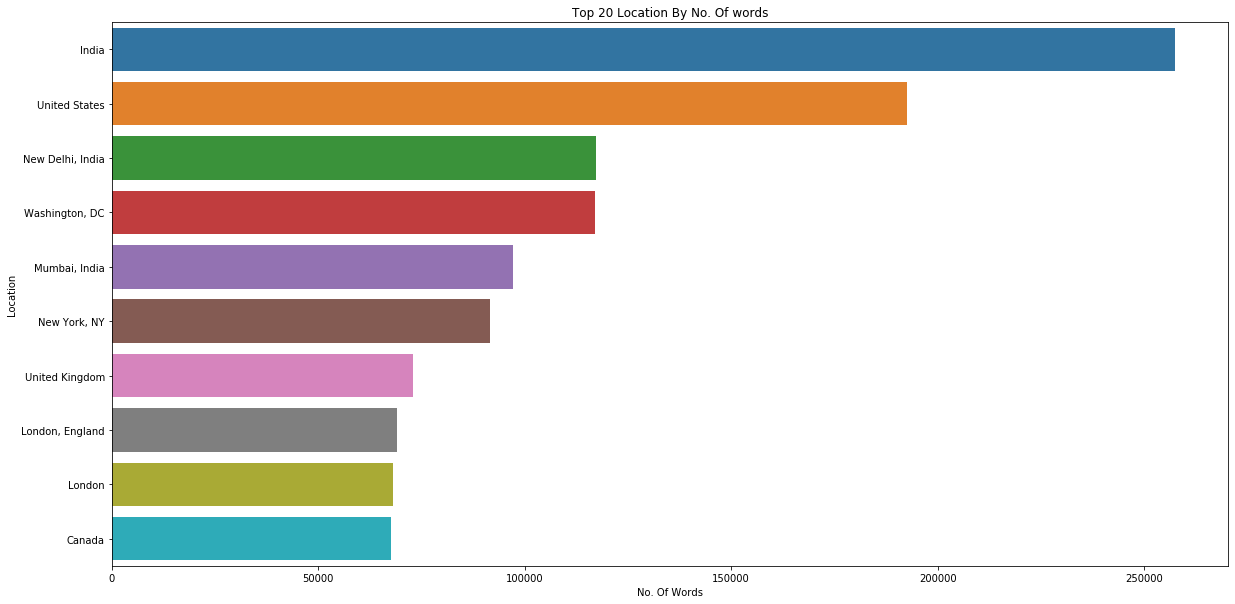

In [36]:
#Top 10 locations for words

plt.figure(figsize=(20,10))
num_texts = pd.DataFrame()
num_texts["user_location"] = Covid_tweets["user_location"]
num_texts["n_of_texts"] = Covid_tweets["n_of_texts"]

num_texts = num_texts.sort_values(by = "n_of_texts",ascending=False)
num_texts = num_texts.groupby("user_location").sum().sort_values(by = "n_of_texts",ascending=False)[:10]

sns.barplot(list(num_texts.values.flatten()),num_texts.index,)
plt.title("Top 20 Location By No. Of words")
plt.xlabel("No. Of Words")
plt.ylabel("Location")
plt.show()

In [68]:
import string
import datetime
from datetime import datetime
import re
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#import spacy
import random
#from spacy.util import compounding
#from spacy.util import minibatch


In [58]:
# text preprocessing helper functions

def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text


def text_preprocessing(text):
    """
    Cleaning and parsing the text.

    """
    tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
    nopunc = clean_text(text)
    tokenized_text = tokenizer.tokenize(nopunc)
     #remove_stopwords = [w for w in tokenized_text if w not in stopwords.words('english')]
    combined_text = ' '.join(tokenized_text)
    return combined_text

In [59]:
# Applying the cleaning function to data
Covid_tweets['text_clean'] = Covid_tweets['text'].apply(str).apply(lambda x: text_preprocessing(x))

In [60]:
def get_top_n_words(corpus, n=None):
    """
    List the top n words in a vocabulary according to occurrence in a text corpus.
    """
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

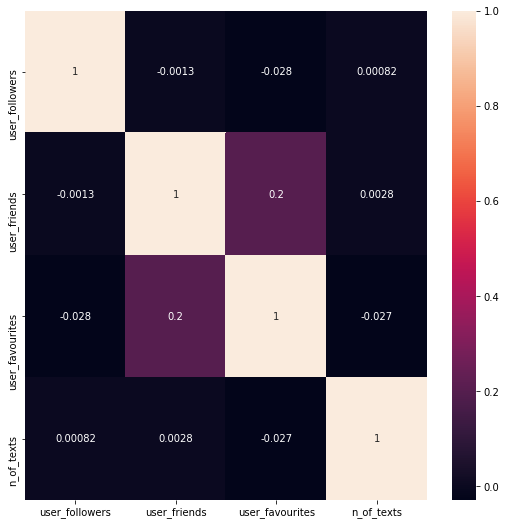

In [69]:
plt.figure(figsize=(9,9))
sns.heatmap(Covid_tweets.drop(["is_retweet","user_verified"], axis = 1).corr(), annot=True)
plt.show()


In [71]:
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

def get_score(text):
    dict_res = sid.polarity_scores(text)
    return dict_res["compound"]

Covid_tweets["Score"] = Covid_tweets["text_clean"].apply(lambda x: get_score(x)) 

[nltk_data] Downloading package vader_lexicon to C:\Users\Aparna
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


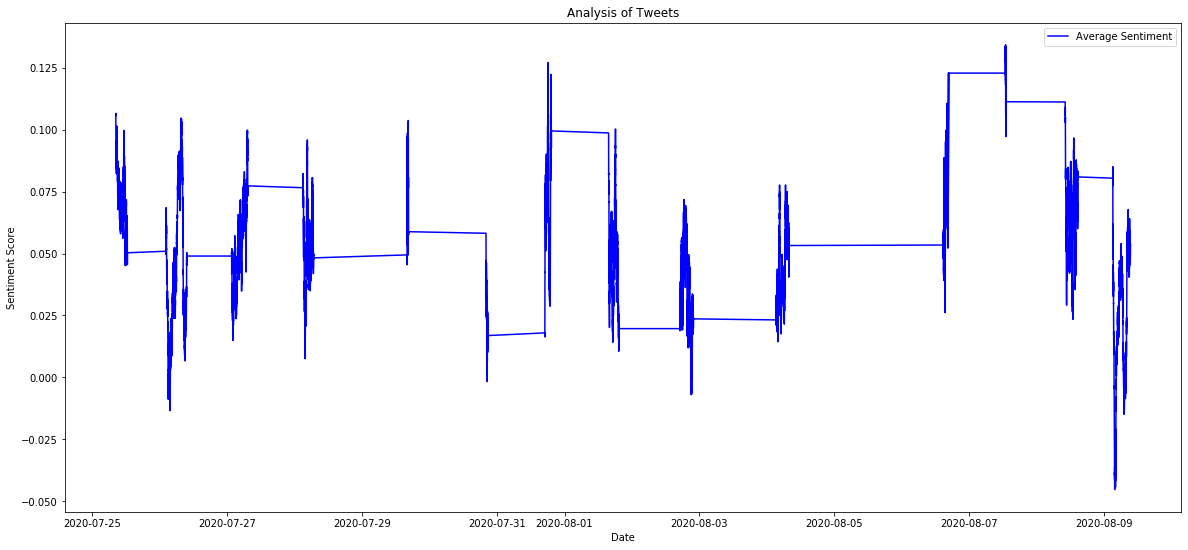

In [72]:
Covid_tweets['date'] = pd.to_datetime(Covid_tweets['date'])
dates = np.array(Covid_tweets['date'])
indices = np.argsort(dates)[10000:]
window = 750

dates = dates[indices][window:]
values = np.array(Covid_tweets['Score'])[indices]
windows = pd.Series(values).rolling(window)
moving_averages = windows.mean()[window:]

plt.figure(figsize=(20,9))
plt.plot(dates, moving_averages, color='blue', label='Average Sentiment')
plt.title('Analysis of Tweets')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.legend();

In [74]:
Covid_tweets["Score"].describe()

count    97710.000000
mean         0.053371
std          0.404406
min         -0.985800
25%         -0.151100
50%          0.000000
75%          0.381800
max          0.975000
Name: Score, dtype: float64

In [75]:
Covid_tweets["Weekday"] = [datetime.weekday(date) for date in Covid_tweets["date"]]

def is_weekend(weekno):
    if weekno<5:
        return "Weekday"
    else:
        return "Weekend"
    
Covid_tweets["weekend_or_weekday"] = Covid_tweets["Weekday"].apply(lambda x: is_weekend(x))

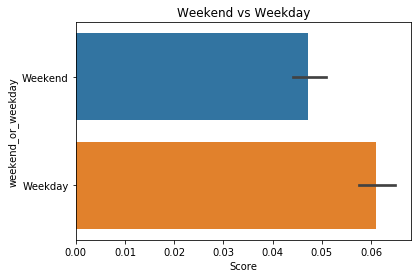

In [76]:
sns.barplot(Covid_tweets["Score"],Covid_tweets["weekend_or_weekday"])
plt.title("Weekend vs Weekday");

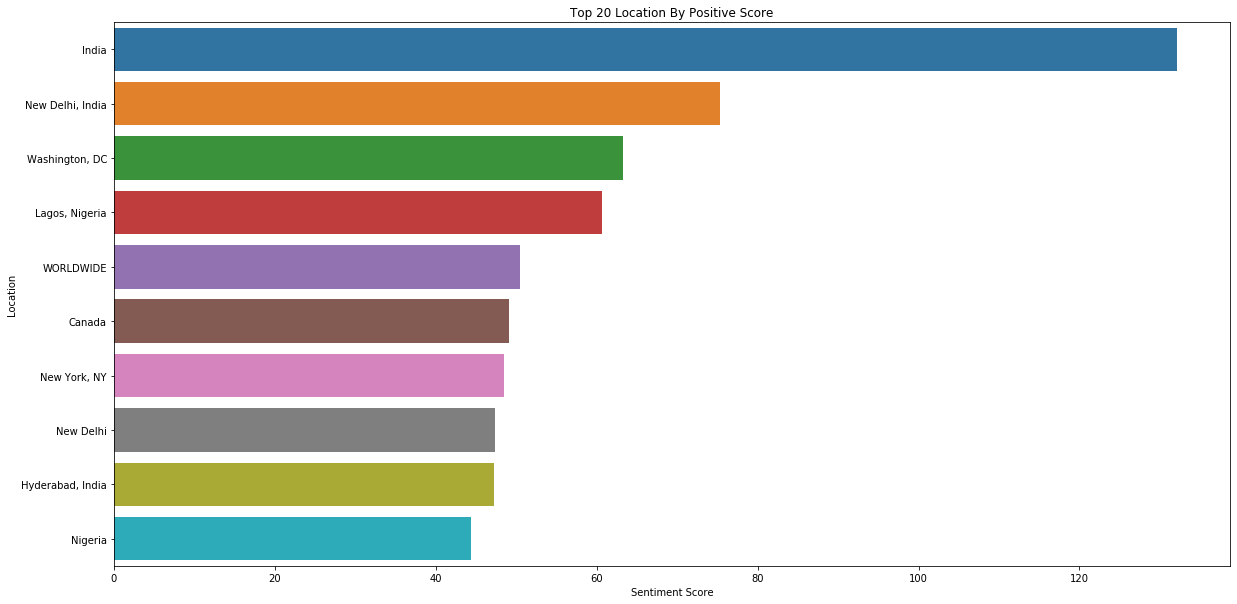

In [79]:
sentiment_countries = pd.DataFrame()
sentiment_countries["Score"] = Covid_tweets["Score"]
sentiment_countries["user_location"] = Covid_tweets["user_location"]

sentiment_countries = sentiment_countries.sort_values(by = "Score",ascending=False)
sentiment_countries = sentiment_countries.groupby("user_location").sum().sort_values(by = "Score",ascending=False)[:10]

plt.figure(figsize=(20,10))
sns.barplot(list(sentiment_countries.values.flatten()),sentiment_countries.index,)
plt.title("Top 20 Location By Positive Score")
plt.xlabel("Sentiment Score")
plt.ylabel("Location")
plt.show()